In [3]:
import pandas as pd
import numpy as np
import requests

In [21]:
# get transactions from bitbank api
def get_transactions(
    cur: str,
    yyyymmdd: str,
):
    url = f'https://public.bitbank.cc/{cur}/transactions/{yyyymmdd}'
    r = requests.get(url, timeout=10)
    data = r.json()
    df = pd.DataFrame(data['data']['transactions'])
    df['price'] = df['price'].astype(np.float64)
    df['amount'] = df['amount'].astype(np.float64)
    df["executed_at"] = pd.to_datetime(df["executed_at"], unit="ms")
    return df


In [51]:
url = f'https://public.bitbank.cc/tickers'
r = requests.get(url, timeout=10)
data = r.json()["data"]
tickers = pd.DataFrame(data)
display(tickers)

,pair,sell,buy,open,high,low,last,vol,timestamp
0,btc_jpy,15470001,15470000,15424195,15509998,15362332,15470001,65.2392,1736058094321
1,xrp_jpy,376.498,376.493,386.529,387.369,373.412,376.336,7112270.5441,1736058094377
2,eth_jpy,572029,572025,566530,577239,563188,571940,1484.6168,1736058094294
3,sol_jpy,34045.6,34045.5,34238.8,34516.0,33587.2,34045.6,6709.8566,1736058092615
4,dot_jpy,1201.501,1197.909,1225.820,1239.986,1191.120,1201.492,20500.0818,1736058093934
5,doge_jpy,61.521,61.505,61.045,62.550,59.256,61.520,22754499.8601,1736058093670
6,ltc_jpy,17620.0,17598.8,17550.0,17730.0,17315.0,17620.0,2386.9931,1736058094238
7,bcc_jpy,74457,74358,75397,76026,74013,74457,975.8848,1736058094377
8,mona_jpy,45.000,44.999,46.600,46.695,44.000,45.000,218924.0559,1736058091704
9,xlm_jpy,70.033,69.978,72.731,73.700,69.486,70.011,5327203.5854,1736058092831


In [28]:
def convert_to_sec_from_midnight(timestamps: pd.Series) -> pd.Series:
    return (timestamps - timestamps.dt.normalize()).dt.total_seconds()

In [31]:
curs = ["btc_jpy", "xrp_jpy", "ltc_jpy", "eth_jpy", "mona_jpy"]
date = "20250104"

cur_2_bt = {}
cur_2_st = {}
for cur in curs:
    df = get_transactions(cur=cur, yyyymmdd=date)
    buy_order_timestamps = df[df["side"] == "buy"]["executed_at"]
    sell_order_timestamps = df[df["side"] == "sell"]["executed_at"]
    cur_2_bt[cur] = convert_to_sec_from_midnight(buy_order_timestamps).to_numpy()
    cur_2_st[cur] = convert_to_sec_from_midnight(sell_order_timestamps).to_numpy()

In [55]:
import c_func
import matplotlib.pyplot as plt

2824 9257


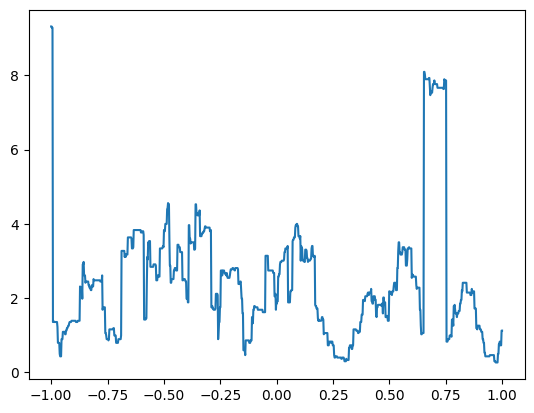

In [64]:
data1 = cur_2_st["btc_jpy"]
data2 = cur_2_st["xrp_jpy"]
print(len(data1), len(data2))

r_grid = np.linspace(-1, 1, 1000)

y_emp = [
    c_func.cross_corr_estimator(
        r, T=60 * 60 * 24, h=0.05, data1=data1, data2=data2
    )
    for r in r_grid
]
plt.plot(r_grid, y_emp)